# Data preprocessing for machine learning

In this notebook, we will explore the basics of data preprocessing for machine learning using the breast cancer dataset from scikit-learn. We will cover loading the dataset, understanding its structure, handling missing values, and scaling features. 

Note that throughout the notebook, there are links to the relevant documentation for the functions and classes used. Click on the links and explore the documentation to deepen your understanding.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Set the style for our visualizations
sns.set_style("whitegrid")
sns.set_palette("deep")

%matplotlib inline

## Loading a dataset

The breast cancer dataset is a classic dataset in machine learning. It contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe characteristics of the cell nuclei present in the image.

Learn more about the dataset in the [original paper](https://doi.org/10.1016/0304-3835(94)90099-X) and on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

Normally, we load datasets from a file using functions like [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). However, this dataset is so often used in tutorials, that it has been included in the [`sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) library. Let's load it and take a look at its structure.


In [2]:
cancer_dataset = datasets.load_breast_cancer(as_frame=True)
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

When loaded, the dataset is represented as a dictionary-like object with several attributes. The main attributes are:
- `data`: A 2D array where each row represents an instance (a breast mass) and each column represents a feature.
- `target`: A 1D array containing the target variable, indicating whether the cancer is malignant (0) or benign (1).
- `feature_names`: An array of strings representing the names of the features.
- `target_names`: An array of strings representing the names of the target classes.

Note that we used the `as_frame=True` parameter when loading the dataset. The feature table is returned as a pandas [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#dataframe), which provides convenient methods for data manipulation and analysis. The target variable is also returned as a pandas Series, which can be regarded as a single column.

The `data` attribute allows us to access the feature values:

In [25]:
features = cancer_dataset.data
features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


And the `target` attribute provides the labels for each instance:

In [4]:
targets = cancer_dataset.target
targets.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

*Question: How many samples and features are in the breast cancer dataset?*

*Answer: The breast cancer dataset contains 569 samples (the number of rows) and 30 features (the number of columns).*

*Bonus Python refresher question: What is the difference between calling a property with parentheses (e.g., `features.head()`) and without parentheses (e.g., `cancer_dataset.target`)?*

*Answer: Properties without parentheses (like `cancer_dataset.target`) are attributes that return data directly, while methods with parentheses (like `features.head()`) are functions that perform actions or computations and may require arguments. Calling a method executes it, while accessing a property retrieves its value.*

## Exploring the dataset

### Exploring the features

First and foremost, it's important to understand the structure and characteristics of the features. This includes checking for missing values, understanding the data types (numerical, categorical), and getting a sense of the distribution of the features.

The Pandas [`dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) property allows us to check the data types of each feature in the DataFrame:

In [5]:
features.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

This dataset contains only numerical features (float values), so we do not need to handle categorical variables. If this would be the case, we could use techniques such as one-hot encoding or label encoding to convert categorical variables into numerical format. You can learn more about these techniques in the [Encoding categorical features](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features) section of the Scikit-learn user Guide.

The Pandas `isnull()` method can be used to check for missing values in the dataset:

In [6]:
features.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Lucky again, this dataset does not contain any missing values. If there would be, Scikit-learn provides several options for handling missing values, as described in the [Handling missing values](https://scikit-learn.org/stable/modules/impute.html) section of User Guide.

We can use pandas methods such as `describe()` to get an overview of the numerical features. Adding `.T` at the end transposes the output for better readability.

In [7]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


This summary provides us with some basic statistics about each feature, such as the mean, standard deviation, minimum, and maximum values. However, it is a bit hard to read. Alternatively, we can visualize the distribution of each feature using box plots. For this, we'll use the Seaborn [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function.

*Detail:* Because the boxplot function expects the data in a long format, we first use the pandas [`melt`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html) method to reshape the DataFrame. You can read more about long vs wide data formats in the [Pandas User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#melt-and-wide-to-long).

<Axes: xlabel='value', ylabel='variable'>

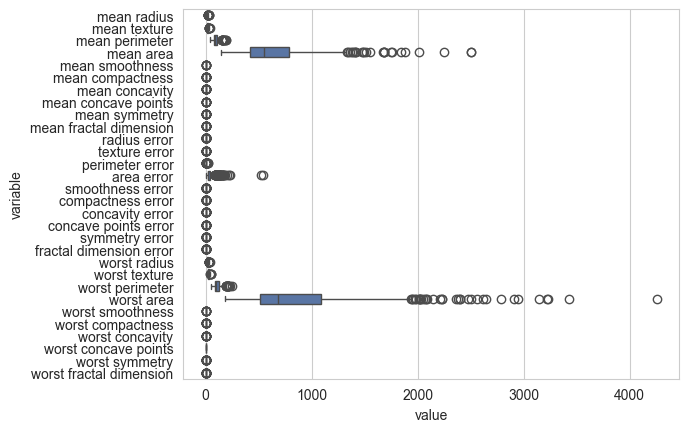

In [8]:
sns.boxplot(data=features.melt(), x="value", y="variable")

*Question: What is immediate obvious from the box plots about the features in the dataset? Are there any features that stand out from the others?*

*Answer: The range of values for different features varies significantly. Some features have a much wider spread of values, while others are more tightly clustered. Additionally, several features exhibit outliers, as indicated by the points outside the whiskers of the box plots. Features like 'mean area', and 'worst area' show particularly high variability compared to others. Features like 'area error' display many outliers.*

These general distribution plots do not show the relationship between the features and the target variable. To explore this, we can create box plots for each feature, grouped by the target variable (malignant vs benign). This will help us understand how the features differ between the two classes.

For instance, let's take a look at the `mean radius` feature:

<Axes: xlabel='mean radius'>

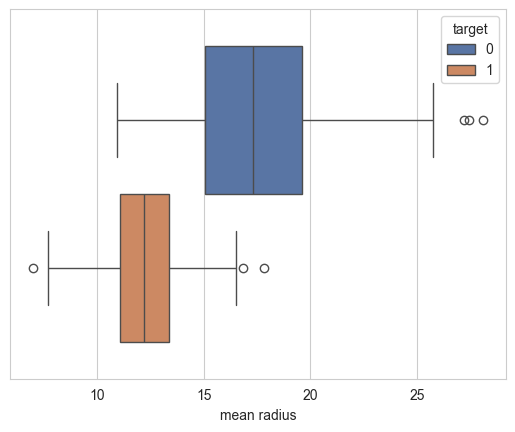

In [9]:
mean_radius_df = pd.DataFrame({
    "mean radius": features["mean radius"],
    "target": targets
})

sns.boxplot(data=mean_radius_df, x="mean radius", hue="target")

Alternatively, we can get a more detailed view of the distribution using histograms. Try it out with the Seaborn [`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function:

<Axes: xlabel='mean radius', ylabel='Count'>

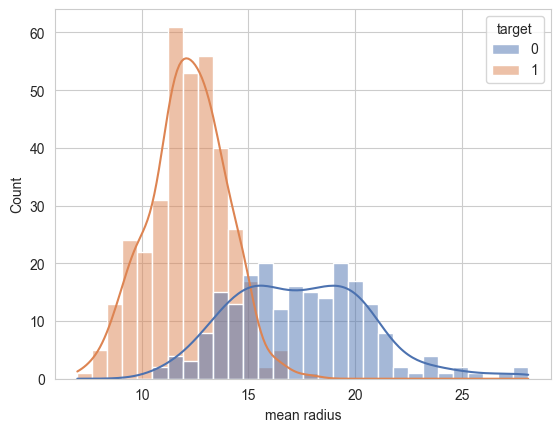

In [29]:
# Complete the histplot function call
sns.histplot(data=features, x="mean radius", hue=targets, kde=True, bins=30)

*Question: What do you think about the distribution of the `mean radius` feature for malignant vs benign tumors? Would this be a useful feature for classification?*


*Answer: The feature shows that malignant tumors tend to have higher `mean radius` values compared to benign tumors. This suggests that `mean radius` could be a useful feature for classification, as it provides some discriminatory power between malignant and benign tumors. However, it does not guarantee perfect separation, and other features should also be considered for a more robust classification model.*

*Task: Repeat the above analysis (box plots and histograms) for at least two other features of your choice from the dataset. Summarize your findings.*

Write your findings here:

...

### Exploring the target variable

The target variable indicates whether the breast mass is malignant or benign. We can use the Pandas [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method to see the distribution of the target classes:

In [11]:
targets.value_counts()

target
1    357
0    212
Name: count, dtype: int64

We can visualize this distribution using a bar plot with the Seaborn [`countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function:

<Axes: xlabel='count', ylabel='target'>

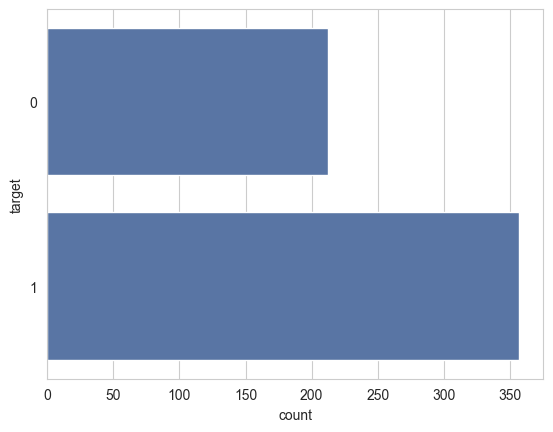

In [30]:
sns.countplot(y=targets, orient="h")

*Question: What do you observe about the class distribution? Is the dataset balanced or imbalanced? How might this impact model training and evaluation?*

*Answer: The count plot shows a moderate imbalance between the two classes. This could affect the performance of machine learning models, as they may become biased towards the majority class. Techniques such as stratification (see below), resampling, or class weighting may be necessary to address this issue during model training.*

## Data splitting

In machine learning, it is crucial to evaluate the performance of our models on unseen data. To achieve this, we typically split our dataset into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance. In real-world scenarios, we might also use a validation set for hyperparameter tuning. For now, we will focus on a simple train-test split.

This can be done easily using the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from the [`sklearn.model_selection`](https://scikit-learn.org/stable/api/sklearn.model_selection.html) module. By default, it splits the data into 75% training and 25% testing sets, but we can adjust this ratio using the `test_size` parameter. The function allows us to pass multiple arrays (e.g., features and target) and splits them consistently; i.e., the corresponding rows in the features and target arrays remain aligned after the split.

Note that some datasets contain both features and targets within a single table. In such cases, it is crucial to separate them before proceeding with your analysis.

In [31]:
train_features, test_features, train_targets, test_targets = train_test_split(
    features, targets, test_size=0.3, random_state=42
)

print(f"Training set shape: {train_features.shape}")
print(f"Testing set shape: {test_features.shape}")

print(f"Percent positives in training set: {train_targets.value_counts(normalize=True)[1]:.2f}")
print(f"Percent positives in testing set: {test_targets.value_counts(normalize=True)[1]:.2f}")

Training set shape: (398, 30)
Testing set shape: (171, 30)
Percent positives in training set: 0.63
Percent positives in testing set: 0.63


*Question: What does the `random_state` parameter do in the `train_test_split` function? Why is it important to set it?*

*Answer: This parameter controls the shuffling applied to the data before applying the split. Setting a `random_state` ensures that the split is reproducible; i.e., every time you run the code with the same `random_state`, you will get the same train-test split. This is important for reproducibility in experiments and comparisons.*

To account for class imbalance during the split, we can choose use the `stratify` parameter. By setting it to the target variable, we ensure that the proportion of classes in both the training and testing sets reflects that of the original dataset.

In [32]:
train_features, test_features, train_targets, test_targets = train_test_split(
    features, targets, test_size=0.3, random_state=42, stratify=targets
)

print(f"Training set shape: {train_features.shape}")
print(f"Testing set shape: {test_features.shape}")

print(f"Percent positives in training set: {train_targets.value_counts(normalize=True)[1]:.2f}")
print(f"Percent positives in testing set: {test_targets.value_counts(normalize=True)[1]:.2f}")

Training set shape: (398, 30)
Testing set shape: (171, 30)
Percent positives in training set: 0.63
Percent positives in testing set: 0.63


*Question: After performing the stratified split, do you see a difference in the percentage of positive classes compared to the initial split? Why is this the case? When would it not be the case?*

*Answer: In this case, there is no difference between a split without stratification and one with stratification. Stratification is more impactful when dealing with highly imbalanced datasets with a lower number of samples. In this case, there were enough samples to maintain the class distribution even without stratification. Nevertheless, using stratification is a good practice to ensure consistent class distribution across splits, especially in imbalanced datasets.*

## Feature scaling

Many machine learning algorithms are sensitive to the scale of the input features. Features with larger scales can dominate the learning process, leading to suboptimal performance. To address this, we often apply feature scaling techniques to standardize or normalize the features.

As we saw earlier, the features in the breast cancer dataset have varying scales. For instance, the `mean radius` feature ranges from approximately 6 to 30, while the `worst area` feature ranges from about 200 to 2500. To ensure that all features contribute equally to the learning process, we can apply feature scaling.

Here, we will cover two common scaling techniques: Standardization and Min-Max Scaling. You can learn more about these techniques in the [scikit-learn User Guide](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler).

### Standardization using `StandardScaler`

The [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) class standardizes features by removing the mean and scaling to unit variance. This means that the resulting distribution of each feature will have a mean of 0 and a standard deviation of 1.

In [15]:
scaler = StandardScaler()
scaler.fit(train_features)
train_features_standardized_array = scaler.transform(train_features)
test_features_standardized_array = scaler.transform(test_features)

We used two steps to apply the `StandardScaler`:

1. **Fit the scaler on the training data**: This computes the mean and standard deviation for each feature in the training set.
2. **Transform both the training and testing data**: This applies the scaling using the parameters computed from the training set.

It is crucial to fit the scaler only on the training data to avoid data leakage. Data leakage occurs when information from the test set is used to inform the training process, leading to overly optimistic performance estimates. While it might not seem intuitive, this also applies to scaling techniques. Scaling always takes place **after** the data splitting.
Never do:

```python
scaler.fit(features)  # Incorrect: fitting on the entire dataset
scaled_features = scaler.transform(features)
```


To simplify your code, sklearn provides a `fit_transform` method that combines both fitting and transforming in one step for the training data. However, remember to use the `transform` method separately for the test data.

*Task: Repeat the entire process in the previous code cell, but using the `fit_transform` method for the training data. Make sure to use the correct methods on the correct data sets.*

In [16]:
# Write the code for the full standardization process using fit_transform and transform methods
scaler = StandardScaler()
train_features_standardized_array = scaler.fit_transform(train_features)
test_features_standardized_array = scaler.transform(test_features)

Note that these functions return NumPy arrays. To convert them back to pandas DataFrames for easier handling, we can use the following approach, where we also retain the original column names:

In [17]:
train_features_standardized = pd.DataFrame(train_features_standardized_array, columns=train_features.columns)
test_features_standardized = pd.DataFrame(test_features_standardized_array, columns=test_features.columns)

To see the effect of standardization, let's visualize the distribution of a feature before and after scaling.

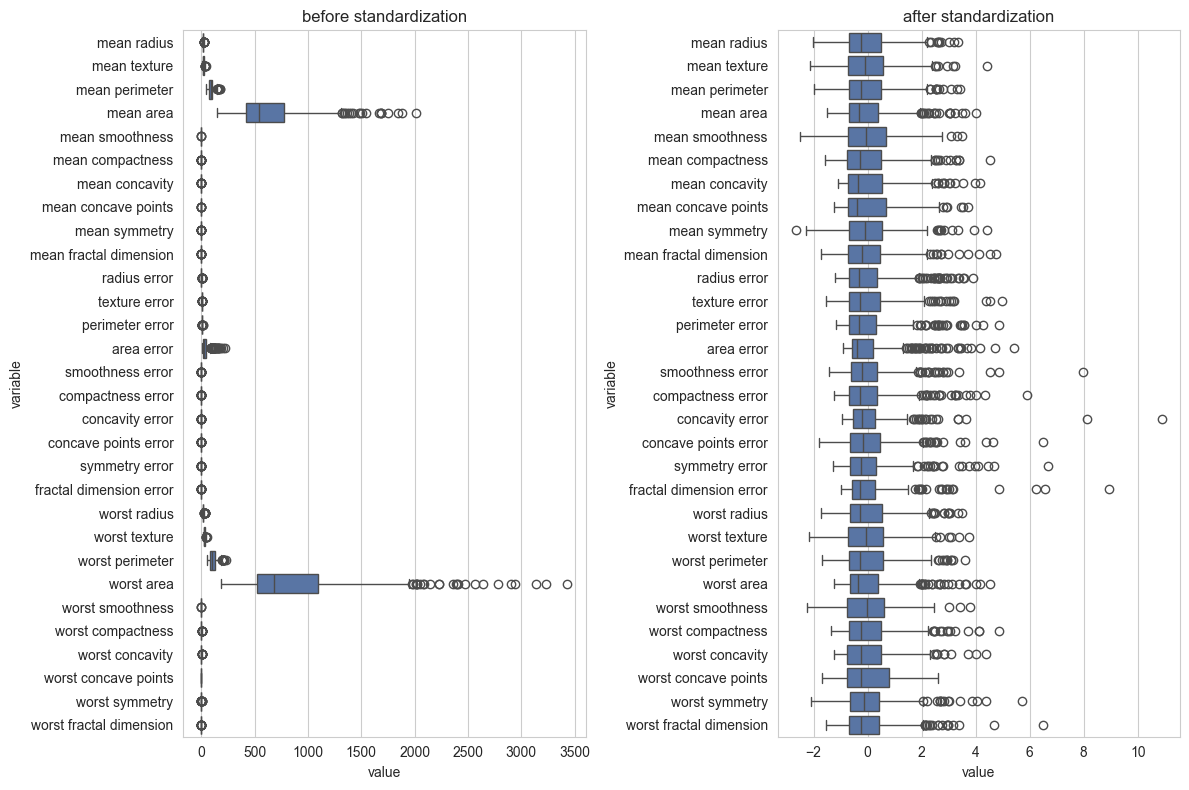

In [18]:
fig, axes = plt.subplots(figsize=(12, 8), ncols=2)

sns.boxplot(data=train_features.melt(), x="value", y="variable", ax=axes[0])
axes[0].set_title("before standardization")

sns.boxplot(data=train_features_standardized.melt(), x="value", y="variable", ax=axes[1])
axes[1].set_title("after standardization")

plt.tight_layout()
plt.show()

The feature distributions already look more comparable after standardization.

### Scaling features between 0 and 1 using `MinMaxScaler`

The `MinMaxScaler` scales features to a specified range, typically between 0 and 1. This is done by subtracting the minimum value of each feature and then dividing by the range (max - min). The resulting values will be within the specified range. The scikit-learn [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) class provides a similar interface to the `StandardScaler`.

*Task: Repeat the entire scaling process using the `MinMaxScaler`. Visualize the feature distributions before and after scaling, similar to what we did for the `StandardScaler`.*

In [19]:
# Complete the code for the full scaling process using fit_transform and transform methods.
# Ensure to end up with DataFrames for both train and test sets in the variables:
# train_features_scaled
# test_features_scaled

min_max_scaler = MinMaxScaler()
train_features_scaled_array = min_max_scaler.fit_transform(train_features)
test_features_scaled_array = min_max_scaler.transform(test_features)

train_features_scaled = pd.DataFrame(train_features_scaled_array, columns=train_features.columns)
test_features_scaled = pd.DataFrame(test_features_scaled_array, columns=test_features.columns)

Let's visualize the distribution of the features before and after scaling for both scaling methods.

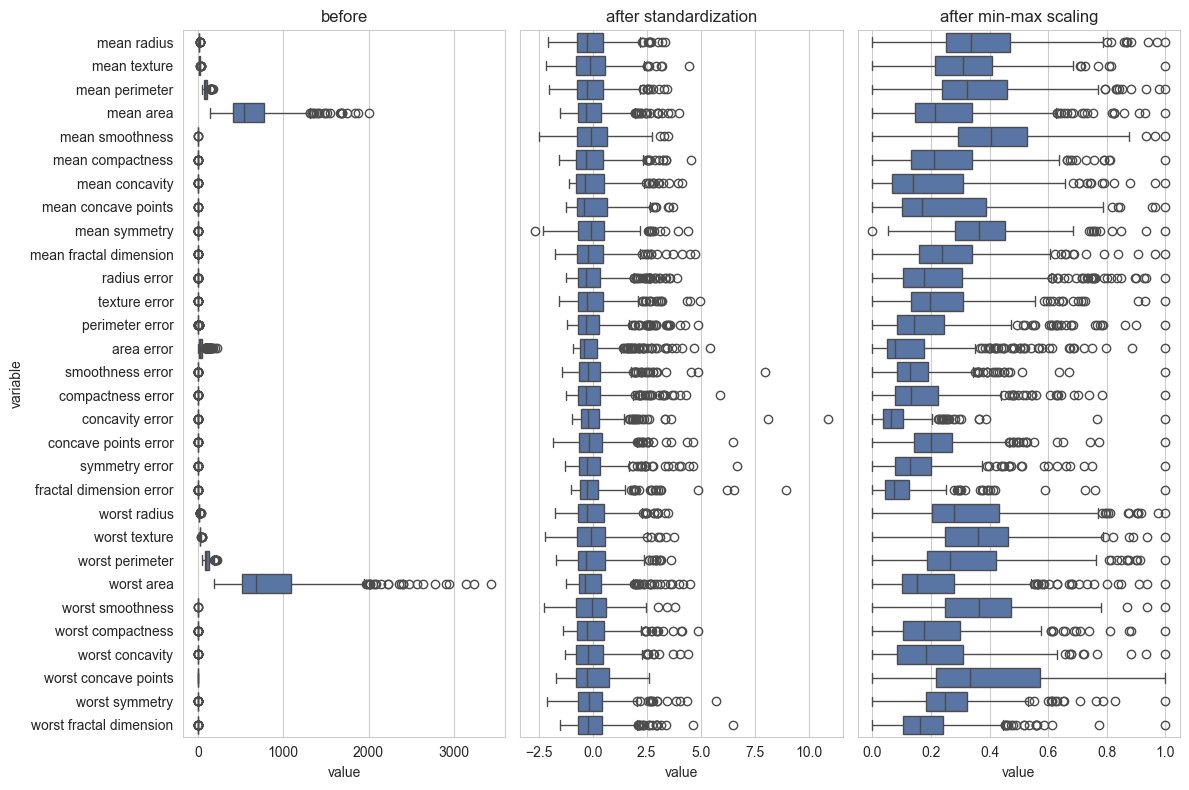

In [20]:
fig, axes = plt.subplots(figsize=(12, 8), ncols=3)

sns.boxplot(data=train_features.melt(), x="value", y="variable", ax=axes[0])
axes[0].set_title("before")

sns.boxplot(data=train_features_standardized.melt(), x="value", y="variable", ax=axes[1])
axes[1].set_title("after standardization")

sns.boxplot(data=train_features_scaled.melt(), x="value", y="variable", ax=axes[2])
axes[2].set_title("after min-max scaling")

# Hide repeated y-axis label and tick labels on the middle and right plots
for idx in [1, 2]:
    axes[idx].set_ylabel("")
    axes[idx].tick_params(labelleft=False, left=False)

plt.tight_layout()
plt.show()

*Question: Based on the box plots, how do the feature distributions differ after applying standardization and min-max scaling? What about outliers?*

*Answer: Both methods effectively scaled the features, but they did so in different ways. With standardization, the data distribution is consistent across all features, with varying ranges due to the outliers. With min-max scaling, all features are constrained to the same range (0 to 1), including the outliers. However, the overall distributions are more variable.*

StandardScaler is preferred for most ML algorithms (logistic regression, SVM, neural networks) that assume normally distributed data. It transforms features to have mean=0 and standard deviation=1, preserves the original distribution shape, and handles outliers better, though values remain unbounded.

MinMaxScaler is necessary when you need features bounded to [0, 1], particularly for neural networks with bounded activation functions (sigmoid, tanh) where matching input/output scales improves convergence, or algorithms like k-NN that don't assume any distribution. However, it's sensitive to outliers—a single extreme value can compress all other values.

Start with StandardScaler for linear models and SVMs; use MinMaxScaler when you specifically need bounded ranges or work with neural networks. Tree-based models (Random Forest, XGBoost) don't require scaling at all.

## Training a simple model

The dataset is now ready for training machine learning models! Here's a sneak peek of a simple
classification model using the logistic regression algorithm:

              precision    recall  f1-score   support

   malignant       0.98      0.88      0.93        64
      benign       0.93      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



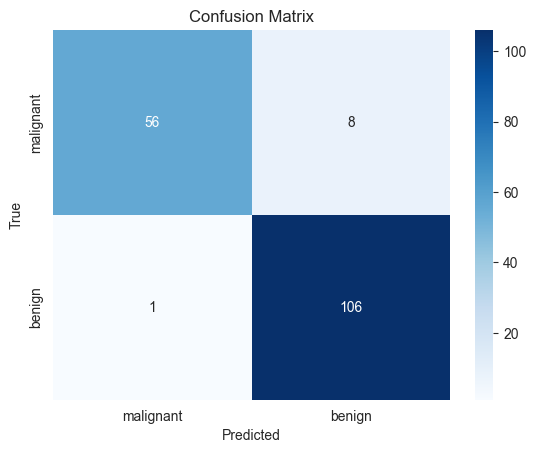

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(train_features_scaled, train_targets)

# Make predictions on the test data
test_predictions = model.predict(test_features_scaled)

# Generate the classification report
print(
    classification_report(
        test_targets, test_predictions, target_names=cancer_dataset.target_names
    )
)

# Generate the confusion matrix
confusion_mat = confusion_matrix(test_targets, test_predictions)
sns.heatmap(
    confusion_mat,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=cancer_dataset.target_names,
    yticklabels=cancer_dataset.target_names,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## Using a pipeline for preprocessing and modeling

To streamline the preprocessing and modeling steps, we can use a Scikit-learn [`Pipeline`](https://scikit-learn.org/stable/modules/compose.html#pipeline-chaining-estimators). A pipeline allows us to chain multiple processing steps together, ensuring that the same transformations are applied consistently during both training and testing. Crucially, it also helps prevent data leakage by encapsulating the entire workflow.

In [24]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(),
)
pipeline.fit(train_features, train_targets)
preds = pipeline.predict(test_features)